# <center> Training Models : Under the Hood

# Linear Regression Model

### General Theory

Let's take the example of life satisfaction problem regarding to the GDP per capita.

A linear regression model of this problem would look like :  $ life\_satisfaction = \Theta_{0} + \Theta_{1} * GDP\_per\_capita $

Generally a Linear regression finction looks like : 
$ \hat{y} = \Theta_{0} + \Theta_{1} * x_{1} + \Theta_{2} * x_{2} + ... + \Theta_{n} * x_{n} $

Where 
* ŷ is the predicted value.
* n is the number of features.
* xi is the ith feature value.
* θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).

More concisely the equation can be written using the vectorized form : $ \hat{y} = h_{0}(x) = \Theta^T · x $



### How to Train it

Training a model means setting it parameters so that the model best fits the set.

To do so we need first to set a measur to know how how well the model fits the data. 

For this purpose the RMSE (Root Mean Squared Error) is the most commonly used metric to measure performance.

Therefor it's simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result :

$$ MSE(X,h_{\Theta}) = \frac{1}{m} \sum^m_{i=1} (\Theta^T · x^{(i)} - y^{(i)} ) $$

To simplify the notation we'll write MSE(θ) instead of MSE(X, hθ).

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution which is called the __Normal Equation__ :
$$ \hat{\Theta} = (X^T . X)^{-1} . X^T . y $$

* $\hat{\Theta} $ is the value of θ that minimizes the cost function.
* y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Let’s generate some linear-looking data to test this equation on

In [2]:
import numpy as np

X= 2*np.random.rand(100,1)
y= 4 + 3 * X + np.random.rand(100,1)

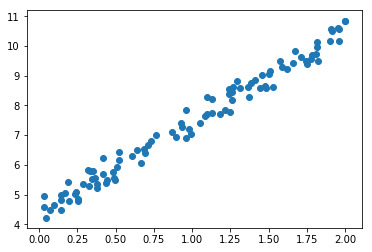

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=X,y=y)

Now let's compute the $\hat{\Theta}$ using the Normal equation.

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise.

Let’s see what the equation found:

In [12]:
theta_best

array([[4.38936035],
       [3.07096416]])

We would have hoped for $\Theta_{0}$ = 4 and $\Theta_{1}$ = 3 instead of $\Theta_{0}$ = 3.865 and $\Theta_{1}$ = 3.139. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $\hat{\Theta}$:

In [15]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[ 4.38936035],
       [10.53128866]])

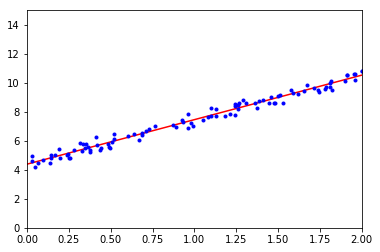

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn looks like this :

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.38936035] [[3.07096416]]
[[ 4.38936035]
 [10.53128866]]


### Computational Complexity

The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3).

On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large training sets efficiently, provided they can fit in memory.

# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

More simply : Let's assume we are lost in the mountains in a dense fog: we can only feel the slope behinf our feet. A good strategy to get to the bottom of the valley quickly is to get in the direction of the steepest slope.

This is exactly what Gradient Descent does : it measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, the minimum is reached ! 

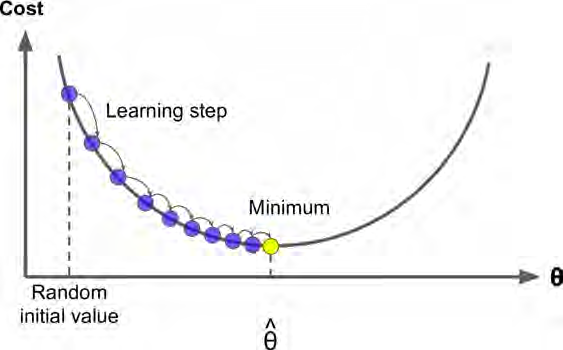

An important parameter of this algorithm is the size of the steps we take :

If the steps are to small, then the execution will end like this, by converging very slowly to the minimum, or never !
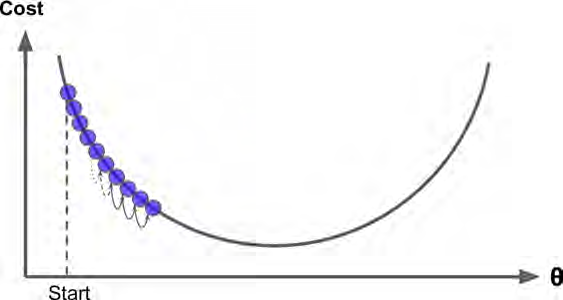


If they are too big, then it will end end like this :
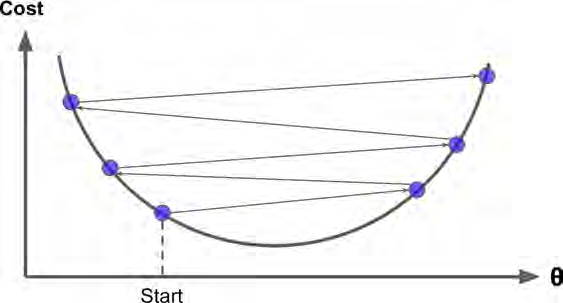

Finaly, the cost function generally dont looks like a nice bowl. Its can be like this :

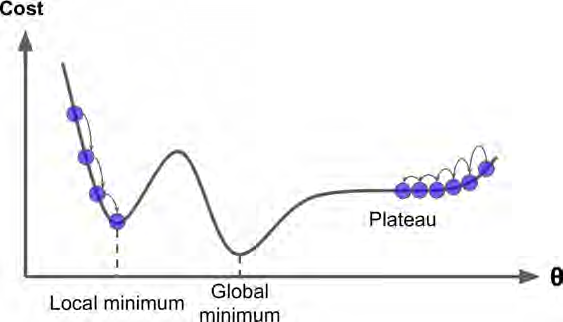

Creating a problem : the possibility of only reaching a local minimum and not the global !

## Batch Gradient Descent

## Stochastic Gradient Descent

## Mini-batch Gradient Descent